# Getting started
# MROB library is unfinished version of Mobile Robotics library. 
Please, don't publish this library anywhere. 

### MROB: Mobile Robotics library
The Skoltech Mobile Robotics library (mrob) is our common framework for implementing our robotics research and projects. It includes a core set of functionalities including perception, path planning and optimization. The present library is meant to be a self-contained library.

- common: common matrix definitions and typedefs.
- **SE3: Rigid Body Transformations library.**
- Fgraph: Factor Graph (WIP)
- PCReg: Point Cloud Registration (WIP)
- mrobPy Python bindings (using pybind11) for some of the above methods.

#### SE3 


 - **Constructors**:
    - Mat61,requires the Transformation in Se3
    - Mat4, requires the Transformation matrix 4x4, Lie algebra xi^ \in se3 representing the rigid body transformation around the identity, by default generates T = exp(0^) = I
    - SE3, allows to construct from Eigen expressions

  *Returns True is the matrix is a valid transformation and False if not*
 - **T()**, 4x4 Transformation matrix
 - **R()**, returns a matrix 3x3 of the SO3 rotation corresponding to the subblock matrix
 - **t()**, returns translation vector
 - **mul()**, multiplication function
 - **update_lhs()**, updates the current transformation incrementaly
 - **update_rhs()**,  exponential mapping of a skew symetric matrix in se3.
 - **ln()**, logarithm map, first we calculate ln(R) and then 
 
 V^-1 = I - 1/2 w^ + 1/o^2(1 - A / 2B) (w^)^2, $v = V^-1 t$ 

 Returns the vector $xi \in R^6$ which corresponds to the Lie algebra SE3
 - **transform()**, transforms a point $p = (x,y,z)'$ such as $res = T*p$. This function saves to transform to homogeneous coordinates.
 - **transform_array()**, transforms an array of points $P = {p_n} = (x,y,z)'_n$ such as $res = T*p_n$. The array is of the form $3xN$. This function saves to transform to homogeneous coordinates.
 - **inv()**, inverse: 
 $$
 T^-1 = \begin{vmatrix}
R'&-R't\\
0&1\\
\end{vmatrix}
$$
 - **adj()**, Adjoint: T Exp(x) = Exp ( Adj_T x) T
  $$
Adj_T  = \begin{vmatrix}
R & 0\\
t^R&R\\
\end{vmatrix}
$$
 - **distance()**,provide the distance as a norm on the tangent space of the $ln(T * T_{rhs}^{-1}) $
 - **print()**

## Download not compiled version of MROB libraray (mrob.zip) and unzip it

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='16sBf2VtnnlUnIPgqoKpR_rN8WTU88uSA',
                                    dest_path='./mrob.zip',
                                    unzip=True)

gdd.download_file_from_google_drive(file_id='1HQqNHCEqvzt2ZgDRAtUJjQoWoboQRfLS',
                                    dest_path='./points_dict.pkl',
                                    unzip=False)

Unzipping...Done.


## Install dependencies and compile the library


In [2]:
!sudo apt install build-essential cmake python3-distutils python3-dev libeigen3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-distutils is already the newest version (3.6.9-1~18.04).
python3-distutils set to manually installed.
Suggested packages:
  libeigen3-doc libmrpt-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 810 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeigen3-dev all 3.3.4-4 [810 kB]
Fetched 810 kB in 1s (1,017 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> 

In [3]:
!cd mrob && mkdir build && cd build && cmake .. && make -j

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Eigen not found, adding manually directories. BE CAREFULL to have installed Eigen here:/usr/local/include/eigen3/usr/include/eigen3
/usr/local/include/eigen3/usr/include/eigen3
-- Found PythonInterp: /usr/bin/python3.6 (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO ena

## Check if everything exists

In [4]:
!ls -l 'mrob/lib'

total 800
-rwxr-xr-x 1 root root  13880 Mar 20 08:35 libcommon.so
-rwxr-xr-x 1 root root  51640 Mar 20 08:36 libEigenFactors.so
-rwxr-xr-x 1 root root 203344 Mar 20 08:36 libFGraph.so
-rwxr-xr-x 1 root root 207704 Mar 20 08:36 libPCRegistration.so
-rwxr-xr-x 1 root root  65496 Mar 20 08:35 libSE3.so
-rwxr-xr-x 1 root root 269952 Mar 20 08:36 mrob.cpython-36m-x86_64-linux-gnu.so


## Import libraries

In [0]:
path = 'mrob/lib'
import sys
sys.path.append(path)
import mrob

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def skew(x):
    return np.array([[0, -x[2], x[1]],
                     [x[2], 0, -x[0]],
                     [-x[1], x[0], 0]])


In [0]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls

drive  mrob  mrob.zip  points_dict.pkl	sample_data


In [9]:
!ls drive/My\ Drive/Colab\ Notebooks/Perception\ in\ Robotics/PS4

data.pkl  PS4.ipynb  T.pkl


In [0]:
data = load_obj('drive/My Drive/Colab Notebooks/Perception in Robotics/PS4/data')

In [0]:
X = data['X']
Y = data['Y']
S = data['S']

In [12]:
X.shape, Y.shape,S.shape

((20, 3), (20, 3), (20, 3, 3))

In [0]:
T_true = load_obj('drive/My Drive/Colab Notebooks/Perception in Robotics/PS4/T')

# Task1 
# A. Plot, initial transformation

In [0]:
def plot_transformation(X,Y,T, plot_x = True):

  fig = plt.figure()
  ax = plt.axes(projection='3d')

  transformed_points = np.zeros(X.shape)
  for i in range(len(X)):
    transformed_points[i] = T.transform_array(X[i]).squeeze() # T.transform_array(X[i]) return (3,1) matrix

  if plot_x:
    ax.scatter3D(X[:,0], X[:,1], X[:,2], c="green")
  ax.scatter3D(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2], c="blue")
  ax.scatter3D(Y[:,0], Y[:,1], Y[:,2], c="red")

  for i,j,k,h,l,m in zip(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2], Y[:,0], Y[:,1], Y[:,2]):
      ax.plot([i,h],[j,l],[k,m],color = 'g')

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


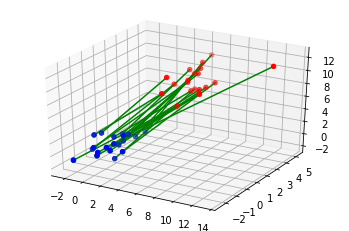

In [15]:
# Initial transformation estimation
T = mrob.SE3(np.zeros(6))
print(T.T())

plot_transformation(X,Y,T)

# B. Cost


In [16]:
# how to take cov matrix S properly??
S[0], np.linalg.inv(S[0])

(array([[2.30456226e-06, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.30941229e-05, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 9.22218527e-02]]),
 array([[4.33921885e+05, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.32050204e+04, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.08434169e+01]]),
 array([[658.72747381,   0.        ,   0.        ],
        [  0.        , 152.33194148,   0.        ],
        [  0.        ,   0.        ,   3.2929344 ]]))

In [0]:
def cost_val(X,Y,T):
  transformed_points = np.zeros(X.shape)
  cost = 0
  for i in range(len(X)):
    r = -(T.transform_array(X[i]).squeeze() - Y[i])
    current_point_cost = 0.5*(r @ np.linalg.inv(S[i]) @ r)
    # print(current_point_cost)
    cost += current_point_cost
  # print('\nfinal cost:',cost)
  return cost

In [18]:
cost_val(X,Y,T)

10994762.233795457

# C. Gradient

In [0]:
def grad_val(X,Y,T):

  # R = (Y.T - T.transform_array(X.T))

  grad = np.zeros(6)
  for i in range(len(X)):
    
    rot = skew(T.transform(X[i]))
    grad_i = -np.hstack( (-rot , np.eye(3)))
    
    r = -(T.transform_array(X[i]).squeeze()-Y[i])
    # r = R[:,i]

    grad += r @ np.linalg.inv(S[i]) @ grad_i
    
    # print(r @ np.linalg.inv(S[i]) @ grad_i)
    # print(grad)
    # print()

  return grad

In [20]:
grad_val(X,Y,T)

array([   22076.38721072, -1215653.73313155, -5237119.62555151,
       -3075321.07552742,   -80008.2013959 ,    -6970.49691237])

# D. Transformation update

Last error 1210.2357406267806
last diff err 0.01580940864596414


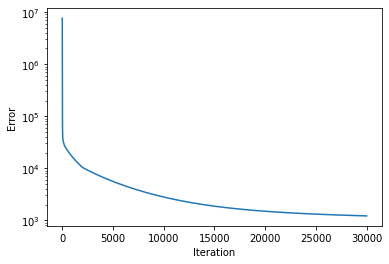

In [32]:
T = mrob.SE3(np.zeros(6))
alpha = 0.5*1e-6*np.hstack((0.1*np.ones(3),np.ones(3)))

error_list = []
prev_error = 0
for i in range(20000): # yeah, it is terribly long..

  grad = grad_val(X,Y,T)
  T.update_lhs(- alpha * grad)
  # p(T.T())

  diff_err = prev_error - cost_val(X,Y,T)
  error_list.append(cost_val(X,Y,T))
  prev_error = cost_val(X,Y,T)
  # print(cost_val(X,Y,T))

  if i==200:
    alpha *= 0.5
  if i==2000:
    alpha *= 0.5

plt.semilogy(error_list)
plt.xlabel('Iteration')
plt.ylabel('Error')

print('Last error', error_list[-1])
print('last diff err',diff_err)

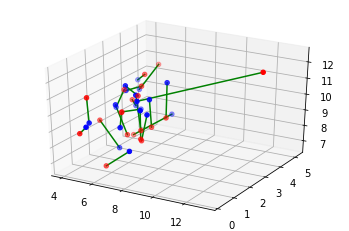

In [30]:
plot_transformation(X,Y,T, plot_x=False)
# plot_transformation(X,Y,T)

In [33]:
print('Estimated RBT:', T.T(), sep='\n')

Estimated RBT:
[[ 0.40452071 -0.86256807 -0.30387386  5.76398799]
 [ 0.58851229  0.49985815 -0.63544875  2.74346392]
 [ 0.70001163  0.07821867  0.70983488  9.56000882]
 [ 0.          0.          0.          1.        ]]


In [28]:
print('True RBT:', T_true, sep='\n')

True RBT:
[[ 0.7438831  -0.50134356  0.44191919  6.04302334]
 [ 0.65938053  0.44284877 -0.60753789  2.62663025]
 [ 0.10888184  0.74333008  0.66000389  9.21214559]
 [ 0.          0.          0.          1.        ]]


# Task 2. 

In [0]:
def grad_val_second_order(X,Y,T):

  # R = (Y.T - T.transform_array(X.T))

  grad = np.zeros((6,6))
  for i in range(len(X)):
    
    rot = skew(T.transform(X[i]))
    grad_i = -np.hstack( (-rot , np.eye(3)))
    
    r = -(T.transform_array(X[i]).squeeze()-Y[i])
    # r = R[:,i]

    # grad += r @ np.linalg.inv(S[i]) @ grad_i
    
    # print(np.linalg.inv(S[i]).shape)
    # print(grad_i.shape)

    # print((grad_i.T @ np.linalg.inv(S[i]) @ grad_i).shape)

    # print(grad_i.T.shape)

    grad += grad_i.T @ np.linalg.inv(S[i]) @ grad_i

    # print(r @ np.linalg.inv(S[i]) @ grad_i)
    # print(grad)
    # print()

  return grad

Last error 21.96186933307484
last diff err 1.1964222323967988e-07


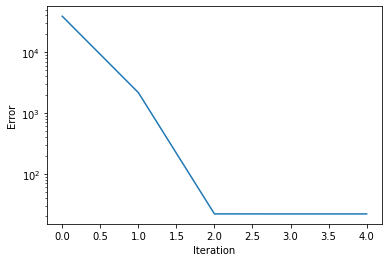

In [35]:
T = mrob.SE3(np.zeros(6))

error_list = []
prev_error = 0
for i in range(5):

  grad = grad_val(X,Y,T)
  grad2 = grad_val_second_order(X,Y,T)
  T.update_lhs(- np.linalg.inv(grad2) @ grad)
  # p(T.T())

  diff_err = prev_error - cost_val(X,Y,T)
  error_list.append(cost_val(X,Y,T))
  prev_error = cost_val(X,Y,T)
  # print(cost_val(X,Y,T))


plt.semilogy(error_list)
plt.xlabel('Iteration')
plt.ylabel('Error')

print('Last error', error_list[-1])
print('last diff err',diff_err)

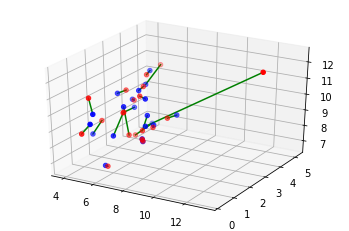

In [36]:
plot_transformation(X,Y,T, plot_x=False)
# plot_transformation(X,Y,T)

In [37]:
print('Estimated RBT:', T.T(), sep='\n')
print('True RBT:', T_true, sep='\n')

Estimated RBT:
[[ 0.74565805 -0.49892298  0.44166722  6.04601232]
 [ 0.65954716  0.45831234 -0.59577457  2.65716594]
 [ 0.09482408  0.73554446  0.67080753  9.16868537]
 [ 0.          0.          0.          1.        ]]
True RBT:
[[ 0.7438831  -0.50134356  0.44191919  6.04302334]
 [ 0.65938053  0.44284877 -0.60753789  2.62663025]
 [ 0.10888184  0.74333008  0.66000389  9.21214559]
 [ 0.          0.          0.          1.        ]]


### Second order method allows to converge much much faster